# 3251 Final Project - Group 3

## Objective: 

### Find what will determine the house price, find features related to the house price.

### Analyze house price using Linear Regression , make some data modifications and outliers remove before finally training the model via a train validation split. 

### Analyze it using more models to test which one is better.




In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn import linear_model, datasets,metrics
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

C:\Users\yujas\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Data Preparation
### Data Source
This dataset contains house sale prices for state KC 
Url=https://www.kaggle.com/pramodkumar8/kc-house#kc_house_data.csv

### Data Quailty
This dataset contains many numeric data which can be easily to use for linear Regression. But we still there are some columns need to be removed from our analysis.

### Data Cleaning and Prepare
We need to remove null value and use correlation to identify the importance of different columns.

In [2]:
#load data
houseDF=pd.read_table("kc_house_data.csv",sep=',')
houseDF.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
houseDF.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Data Checking and Cleaning

In [4]:
### Before data transformation, we will check if there are nulls/bad data, or any duplicates in the file.
# Check Nulls
print(10*'-'+'Check Nulls'+10*'-')
print(houseDF.isnull().sum())
print(50*'-')
# Check Zeros
print(10*'-'+'Check Zeros'+10*'-')
print(houseDF.eq(0).sum())
print(50*'-')
# Check overall dups
print(10*'-'+'Check overall dups'+10*'-')
print(houseDF[houseDF.duplicated()])
print(50*'-')
#check unique values
print(10*'-'+'Check unique values'+10*'-')
houseDFcheck=houseDF.copy()
houseDFcheck["index"]=houseDFcheck.index
print(houseDFcheck.nunique())
print(50*'-')

----------Check Nulls----------
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64
--------------------------------------------------
----------Check Zeros----------
id                   0
date                 0
price                0
bedrooms            13
bathrooms           10
sqft_living          0
sqft_lot             0
floors               0
waterfront       21450
view             19489
condition            0
grade                0
sqft_above           0
sqft_basement    13126
yr_built             0
yr_renovated     20699
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15   

In [5]:
## find the corrlation between price and each variables:
corr_matrix = houseDF.corr()
corr_matrix["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

#### Drop columns unrelated 

In [6]:
# remove "date" and "id","zipcode",which can be hard to interpret in the model
houseDF=pd.read_table("kc_house_data.csv",sep=',')
houseDF=houseDF.drop(["date","id","zipcode"],axis=1)

In [7]:
# correlation between each features
def highlight_vals(val, cutoff_pos=0.80, cutoff_neg=-0.80, color1='lightgreen', color2='red'):
    if val > cutoff_pos:
        return 'background-color: {}'.format(color1)
    elif val < cutoff_neg:
        return 'background-color: {}'.format(color2)
    else:
        return ''
corr_matrix.style.applymap(highlight_vals)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1,-0.0167622,0.00128628,0.00516023,-0.0122578,-0.132109,0.0185252,-0.00272109,0.0115924,-0.0237826,0.00813045,-0.0108421,-0.00515113,0.0213801,-0.016907,-0.00822432,-0.00189093,0.0207986,-0.002901,-0.138798
price,-0.0167622,1,0.30835,0.525138,0.702035,0.0896609,0.256794,0.266369,0.397293,0.0363618,0.667434,0.605567,0.323816,0.0540115,0.126434,-0.0532029,0.307003,0.0216262,0.585379,0.0824472
bedrooms,0.00128628,0.30835,1,0.515884,0.576671,0.0317032,0.175429,-0.00658248,0.0795319,0.0284721,0.356967,0.4776,0.303093,0.154178,0.0188408,-0.152668,-0.00893101,0.129473,0.391638,0.0292442
bathrooms,0.00516023,0.525138,0.515884,1,0.754665,0.0877397,0.500653,0.0637436,0.187737,-0.124982,0.664983,0.685342,0.28377,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.0871754
sqft_living,-0.0122578,0.702035,0.576671,0.754665,1,0.172826,0.353949,0.103818,0.284611,-0.0587526,0.762704,0.876597,0.435043,0.318049,0.0553629,-0.19943,0.0525295,0.240223,0.75642,0.183286
sqft_lot,-0.132109,0.0896609,0.0317032,0.0877397,0.172826,1,-0.00520099,0.0216037,0.0747101,-0.00895825,0.113621,0.183512,0.0152862,0.0530804,0.00764351,-0.129574,-0.0856828,0.229521,0.144608,0.718557
floors,0.0185252,0.256794,0.175429,0.500653,0.353949,-0.00520099,1,0.0236983,0.0294438,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.0063384,-0.0591206,0.0496141,0.125419,0.279885,-0.0112692
waterfront,-0.00272109,0.266369,-0.00658248,0.0637436,0.103818,0.0216037,0.0236983,1,0.401857,0.0166532,0.0827749,0.0720746,0.0805879,-0.0261611,0.0928848,0.0302847,-0.0142738,-0.0419102,0.0864631,0.0307033
view,0.0115924,0.397293,0.0795319,0.187737,0.284611,0.0747101,0.0294438,0.401857,1,0.0459897,0.251321,0.167649,0.276947,-0.0534399,0.103917,0.0848269,0.00615673,-0.0783997,0.280439,0.0725746
condition,-0.0237826,0.0363618,0.0284721,-0.124982,-0.0587526,-0.00895825,-0.263768,0.0166532,0.0459897,1,-0.144674,-0.158214,0.174105,-0.361417,-0.0606178,0.00302552,-0.014941,-0.1065,-0.0928243,-0.00340552


There are duplicated ids, which means the house was sold multiple times during the time span of these dataset. So we can include date and transform it to a indenpendant numerical variable for the house price prediction.

In [8]:
houseDF.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


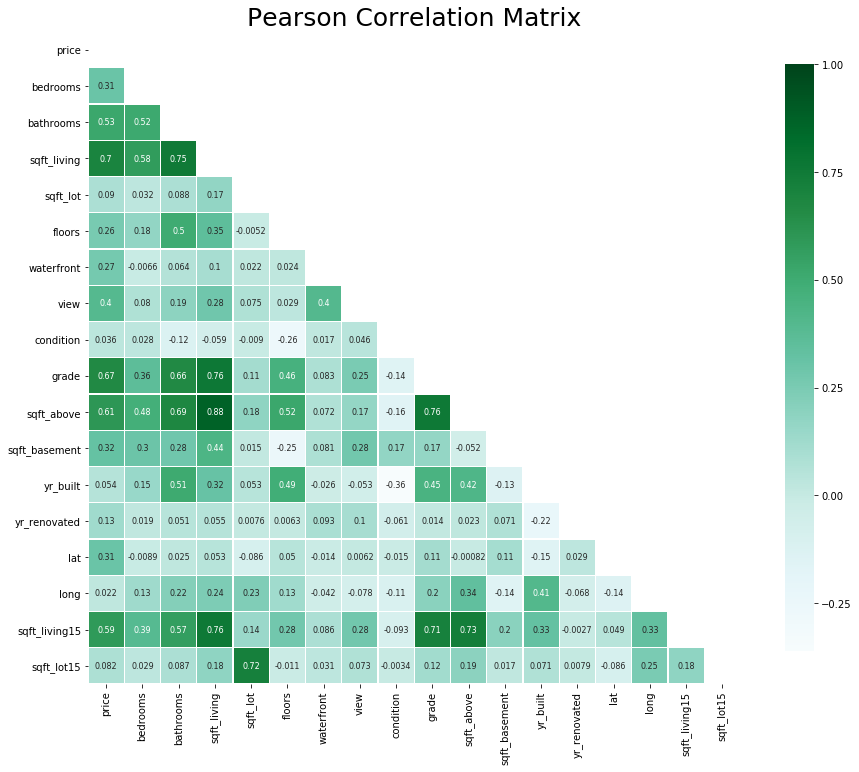

In [9]:
features = houseDF.columns
mask = np.zeros_like(houseDF[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(houseDF[features].corr(),linewidths=0.25,vmax=1,square=True,cmap="BuGn", 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

### Data Analysis 

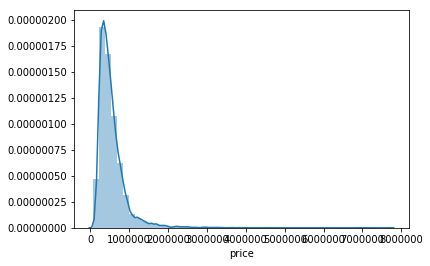

In [10]:
sns.distplot(houseDF['price'])

In [11]:
### Outliers remove price over 2000,000
houseDF = houseDF[houseDF.price <= 2000000]

Text(0.5,1,'Relationship between sqft above and Price')

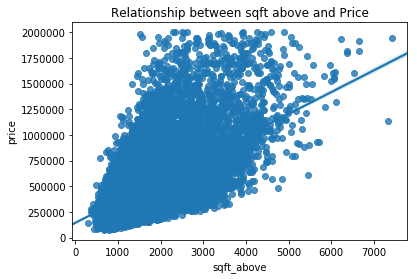

In [12]:
sns.regplot(y="price", x="sqft_above", data=houseDF, fit_reg = True)
plt.title("Relationship between sqft above and Price")

In [13]:
#outliers remove sqft_above > 7000
houseDF = houseDF[houseDF.sqft_above <= 7000]


### Checking for Linearity - Scatterplots

Using scatter plots, let's take a look into the relationships between the variables and price.  In order to create a linear model, the predictors or features that we use must have a linear relationship to price. 

Strong Possible Predictors:
These features have string relationships to price exemplified by a small, tight distribution of data around the line of best fit extimated by the plot.

Number of Rooms
Strong positive coorelation, as the number of rooms increase/decrease, the housing price increases/decreases

In [14]:
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

Text(0.5,1,'Relationship between sqft_living and Price')

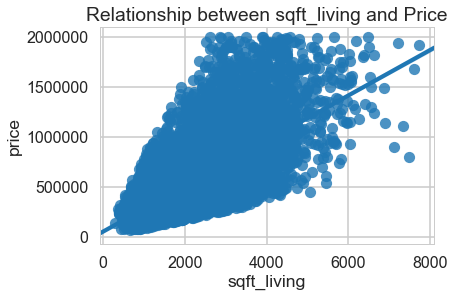

In [15]:
sns.regplot(y="price", x="sqft_living", data=houseDF, fit_reg = True)
plt.title("Relationship between sqft_living and Price")

Text(0.5,1,'Relationship between floors and Price')

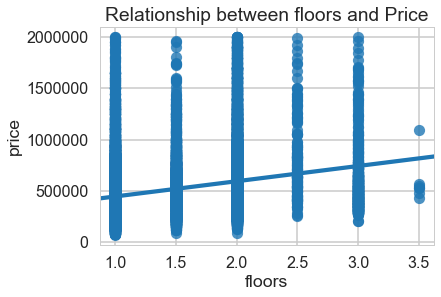

In [16]:
sns.regplot(y="price", x="floors", data=houseDF, fit_reg = True)
plt.title("Relationship between floors and Price")

Text(0.5,1,'Relationship between grade and Price')

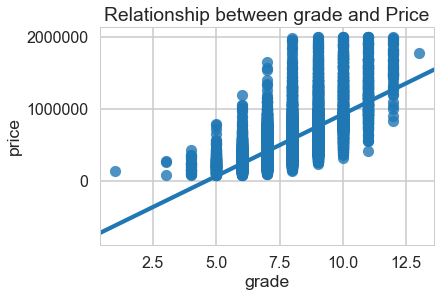

In [17]:
sns.regplot(y="price", x="grade", data=houseDF, fit_reg = True)
plt.title("Relationship between grade and Price")

### Checking for Normality: Histograms

Now we have some possible variables that we can use to predict price. The next assumption we must check is that the values are normally distributed, if they are not we will transform the data so that it is. 

Variables do not need to be normally distributed, that is not a OLS requirement.  Errors have to.  Data variables have to be linearly correlated, transformation may help to make the data relations linear (like in the assignment).  A general data transformation technique is Box-Cox).  The author is checking for linear relations in the first scatter plots.

Taking the log of the data helps to normalize the data and eliminate any skew in the distribution to make patterns more visible and data more interprettable. 

Adjusting the Crime Rate Feature

When we look at our Crime Rate and Price graph, we see it exhibits exponential decay. This can be coorected by taking it's log so that it has a linear relationship with price. 

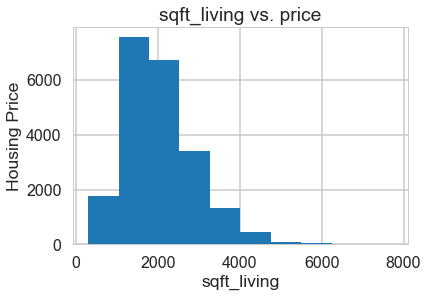

In [18]:
plt.hist(houseDF.sqft_living)
plt.title("sqft_living vs. price")
plt.xlabel("sqft_living")
plt.ylabel("Housing Price")
plt.show()


#### has normal distribution

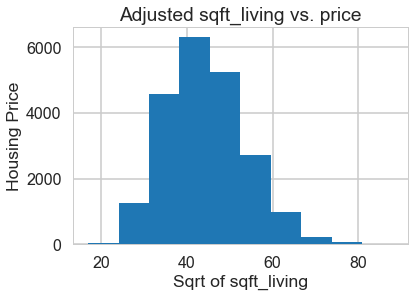

In [19]:
plt.hist(np.sqrt(houseDF.sqft_living))
plt.title("Adjusted sqft_living vs. price")
plt.xlabel("Sqrt of sqft_living")
plt.ylabel("Housing Price")
plt.show()

# has better normal distribution

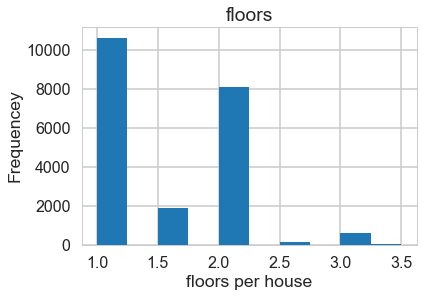

In [20]:
plt.hist(houseDF.floors)
plt.title("floors")
plt.xlabel("floors per house")
plt.ylabel("Frequencey")
plt.show()


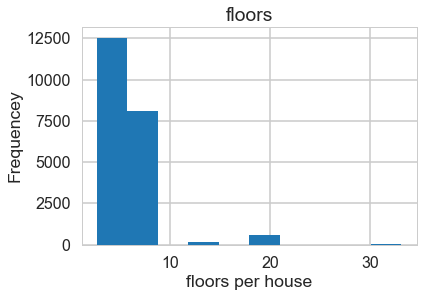

In [21]:
plt.hist(np.exp(houseDF.floors))
plt.title("floors")
plt.xlabel("floors per house")
plt.ylabel("Frequencey")
plt.show()

# after the data transformation, the normality is better

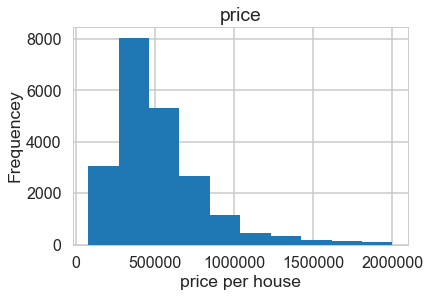

In [22]:
plt.hist(houseDF.price)
plt.title("price")
plt.xlabel("price per house")
plt.ylabel("Frequencey")
plt.show()

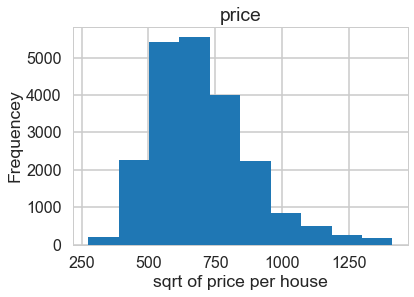

In [23]:
plt.hist(np.sqrt(houseDF.price))
plt.title("price")
plt.xlabel("sqrt of price per house")
plt.ylabel("Frequencey")
plt.show()

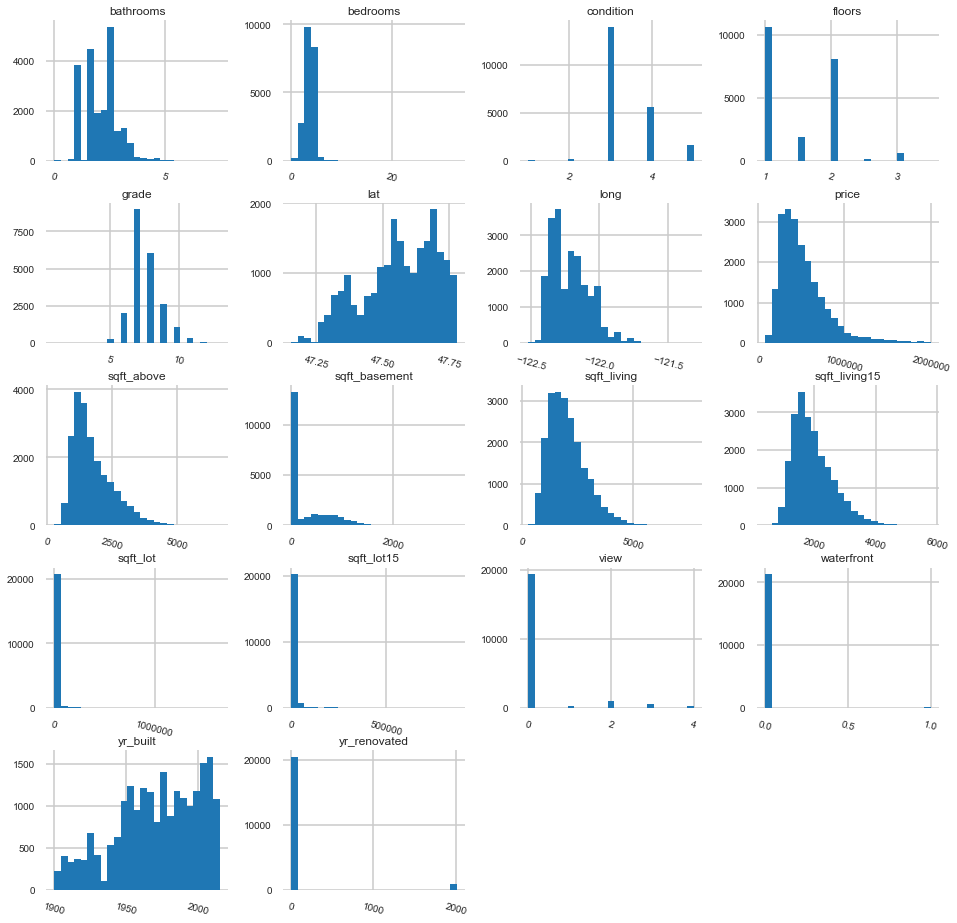

In [24]:
houseDF_1=houseDF[features]
h = houseDF_1.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

In [25]:
# before data transformation
model = ols("price ~ bedrooms + bathrooms + sqft_living + view +waterfront+ condition + sqft_lot + floors + condition + grade + sqft_basement + sqft_above + yr_built + yr_renovated + sqft_living15 + sqft_lot15 +lat + long", 
            data=houseDF).fit()
print(model.summary())
# Adj. R-squared is 0.654 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     3277.
Date:                Mon, 22 Jul 2019   Prob (F-statistic):               0.00
Time:                        14:39:15   Log-Likelihood:            -2.8627e+05
No. Observations:               21413   AIC:                         5.726e+05
Df Residuals:                   21396   BIC:                         5.727e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.202e+07   1.22e+06    -26.138

In [26]:
#tranform data, based on the above histogram, we will transform the below data attribute and it turns out we have higher ADj.R-Sqaure
houseDF['floors'] = np.exp(houseDF['floors'])
houseDF['price'] = np.sqrt(houseDF['price'])
houseDF['sqft_living'] = np.sqrt(houseDF['sqft_living'])


In [27]:
# after tranformation
model = ols("price ~ bedrooms + bathrooms + sqft_living + view +waterfront+ condition + sqft_lot + floors + condition + grade + sqft_basement + sqft_above + yr_built + yr_renovated + sqft_living15 + sqft_lot15 +lat + long", 
            data=houseDF).fit()
print(model.summary())
# Adj. R-squared is higher compare before

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     3745.
Date:                Mon, 22 Jul 2019   Prob (F-statistic):               0.00
Time:                        14:39:44   Log-Likelihood:            -1.2694e+05
No. Observations:               21413   AIC:                         2.539e+05
Df Residuals:                   21395   BIC:                         2.541e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.101e+04    727.323    -28.893

Text(0.5,1,'Relationship between sqft living and Price')

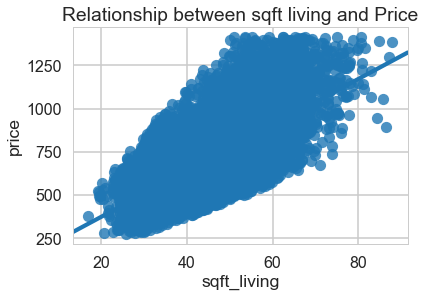

In [28]:
# sqrt living after tranformation
sns.regplot(y="price", x="sqft_living", data=houseDF, fit_reg = True)
plt.title("Relationship between sqft living and Price")

#### Linear Regression Model

In [29]:
# test train split

y = houseDF['price']
x = houseDF[['bedrooms', 'bathrooms','sqft_living','waterfront','view','condition','sqft_lot','floors','condition','grade','sqft_basement','sqft_above','yr_built','yr_renovated','sqft_living15','sqft_lot15','lat','long']]

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=2)

In [31]:
lm = LinearRegression()
lm_results=lm.fit(x_train,y_train)
lm_results

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
lm.score(x_test,y_test)

0.7486552998061622

the linear regression model can explain 74.86% of the case

Text(0,0.5,'Predictions')

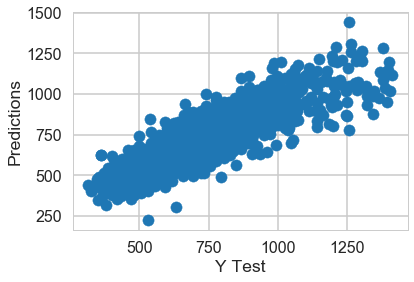

In [33]:
# predict test data
lm_predictions = lm.predict(x_test)
plt.scatter(y_test,lm_predictions)
plt.xlabel('Y Test')
plt.ylabel('Predictions')

In [34]:
print('MSE: ',metrics.mean_squared_error(y_test,lm_predictions))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,lm_predictions)))

MSE:  8441.22487258612
RMSE:  91.87613875531622


So now , we have train data , test data and labels for both let us fit our train and test data into linear regression model.
After fitting our data to the model we can check the score of our data ie , prediction. in this case the prediction is 74.86%

#### Gradient Boosting Model 

In [35]:
from sklearn.ensemble import GradientBoostingRegressor

In [36]:
est =GradientBoostingRegressor(n_estimators= 2000,max_depth=1).fit(x,y)
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,learning_rate = 0.1,loss='ls')

In [37]:
clf.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [38]:
clf.score(x_test,y_test)

0.911502708811276

Text(0,0.5,'Predictions')

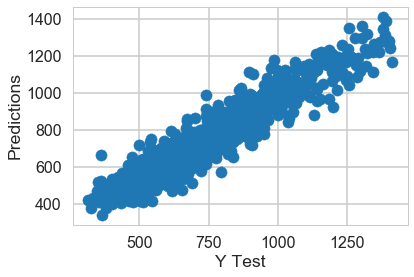

In [39]:
# predict test data
gb_predictions = clf.predict(x_test)
plt.scatter(y_test,gb_predictions)
plt.xlabel('Y Test')
plt.ylabel('Predictions')

In [40]:
print('MSE: ',metrics.mean_squared_error(y_test,gb_predictions))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,gb_predictions)))

MSE:  2972.1157237954285
RMSE:  54.51711404499901


We then fit our training data into the gradient boosting model and check for accuracy
We got a better score 91.1%

Gradient Boosting Model has lower RMSE and higher score, so this model is better predict the housr price

### More models to test

#### Random Forest

In [46]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=500)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
print (model.score(x_test, y_test))

0.8922705329651425


Text(0,0.5,'Predictions')

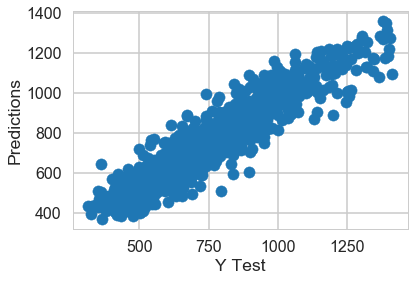

In [47]:
# predict test data
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predictions')

In [48]:
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

RMSE:  60.14992975726593


#### K Neighbors Regressor

In [49]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor() 
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
print (model.score(x_test, y_test))

0.4973877570837122


Text(0,0.5,'Predictions')

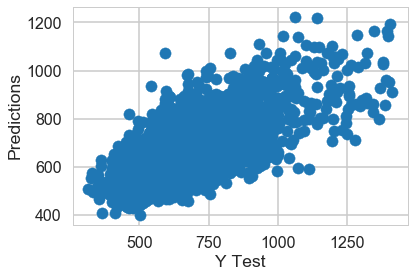

In [50]:
# predict test data
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predictions')

In [51]:
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

RMSE:  129.92250947724537


#### Decision Tree Regressor

In [52]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
print (model.score(x_test, y_test))

0.7856445051281186


Text(0,0.5,'Predictions')

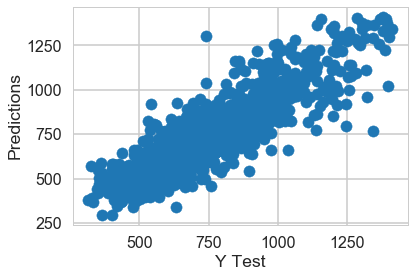

In [53]:
# predict test data
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predictions')

In [54]:
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

RMSE:  84.84674368880505


### After using 5 models:Linear Regression, Gradient Boost, Random Forest, K-Neighbors and Decision Tree to test the accuracy.
### The other model does not beat Gradient Boost which is 91.2%
